In [1]:
# importing important libraries for this project 
import numpy as np
import seaborn as sns 
import pandas as pd
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
from collections import Counter
import pickle
import random

In [2]:
df=pd.read_csv(r'breast-cancer-wisconsin.data')
df.head()#to look how data looks 

,id,clump_thickness,unif_cell_size,unit_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,blend_chrom,norm_nuclei,Mitosis,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## HeatMap to check how are the entity realted to each other 

<AxesSubplot:>

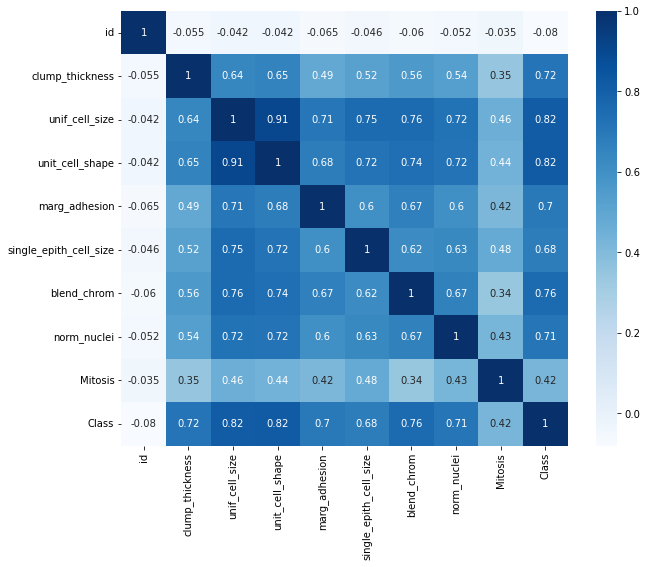

In [3]:
f,ax=plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True,ax=ax)

In [4]:
df.replace('?',-9999,inplace=True)

Class
2    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
4    [[AxesSubplot(0.125,0.725918;0.215278x0.154082...
dtype: object

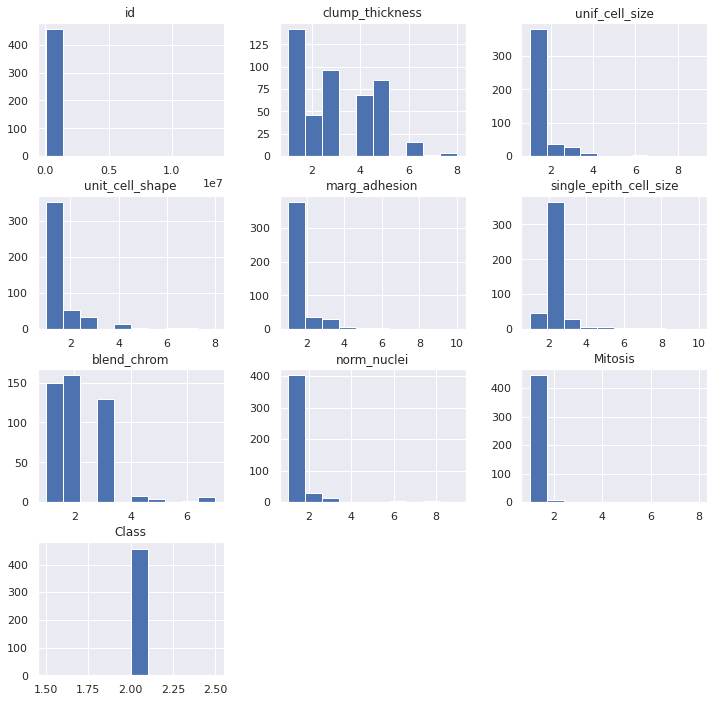

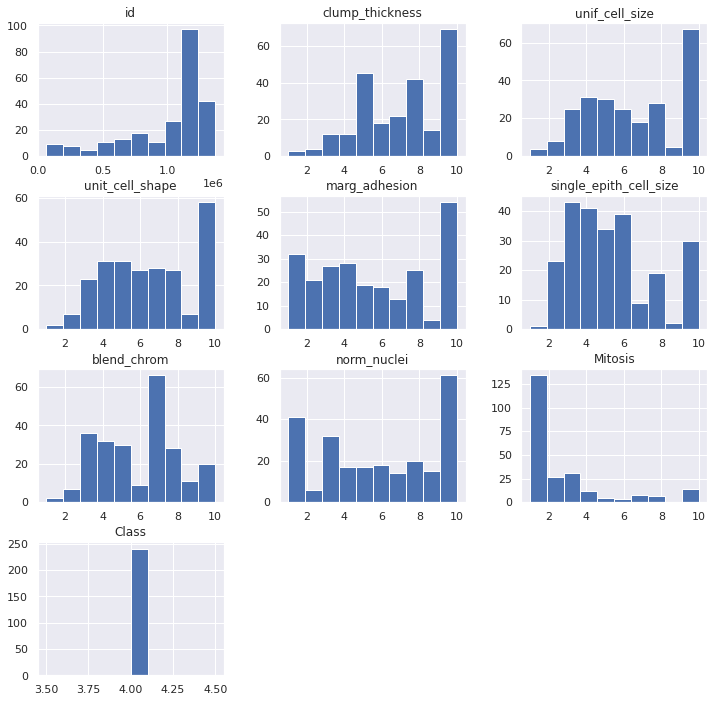

In [5]:
sns.set(style="darkgrid")
df.groupby('Class').hist(figsize=(12, 12))


## so this is necessary id is irrelevant to our label hence it should be dropped

In [6]:
df.drop('id',axis=1,inplace=True)

In [7]:
df.head()

,clump_thickness,unif_cell_size,unit_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,blend_chrom,norm_nuclei,Mitosis,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [8]:
X=np.array(df.drop(['Class'],axis=1))
y=np.array(df["Class"])

In [9]:
X.shape

(699, 9)

In [10]:
y.shape

(699,)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
classifier=neighbors.KNeighborsClassifier()#n_jobs=-1
classifier.fit(X_train,y_train)
accuracy_KNN=classifier.score(X_test,y_test)*100

## Accuracy using scikit model of KNN

In [12]:
accuracy_KNN

98.57142857142858

## Accuracy using scikit model of Naive_Bayes

In [13]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)
accuracy_GaussianNB =classifier.score(X_test,y_test) *100
accuracy_GaussianNB

95.71428571428572

## Accuracy using RandomForest

In [14]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
accuracy_RandomForestClassifier =classifier.score(X_test,y_test) *100
accuracy_RandomForestClassifier

97.85714285714285

## Accuracy using LogisticRegression

In [15]:
classifier = LogisticRegression(random_state=0,max_iter=1000)
classifier.fit(X_train, y_train)
accuracy_LogisticRegression =classifier.score(X_test,y_test) *100
accuracy_LogisticRegression

97.14285714285714

## Accuracy using SVM

In [16]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train) 
accuracy_SVC =classifier.score(X_test,y_test) *100
accuracy_SVC

97.85714285714285

In [17]:
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train) 
accuracy_SVC =classifier.score(X_test,y_test) *100
accuracy_SVC

60.71428571428571

## Accuracy using DecisionTreeClassifier

In [18]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train) 
accuracy_DecisionTreeClassifier =classifier.score(X_test,y_test) *100
accuracy_DecisionTreeClassifier

92.85714285714286

##  KNN Hard code 

In [19]:
style.use('fivethirtyeight')

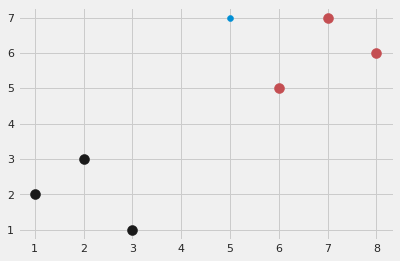

In [20]:
dataset={'k':[[1,2],[2,3],[3,1]],'r':[[6,5],[7,7],[8,6]]}
new_feature = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]]for i in dataset]
plt.scatter(new_feature[0],new_feature[1] )
plt.show()

In [21]:
def k_nearest_neighbors(data,predict,k):
    if len(data)>=k:
        print('warning')
    distances=[]
    for group in data:
        for features in data[group]:
            euclidean_distance=np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
            distances.append([euclidean_distance,group])
    votes=[i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence=Counter(votes).most_common(1)[0][1] / k
    
    return vote_result , confidence
result,confidence = k_nearest_neighbors(dataset,new_feature,k=4)
print(result,confidence)

r 0.75


In [22]:
df2=df.copy()

In [23]:
df2.astype(float).values


array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]])

In [24]:
full_data=df2.astype(float).values.tolist() 

In [25]:
full_data[:5]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 4.0, 4.0, 5.0, 7.0, 10.0, 3.0, 2.0, 1.0, 2.0],
 [3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 2.0],
 [6.0, 8.0, 8.0, 1.0, 3.0, 4.0, 3.0, 7.0, 1.0, 2.0],
 [4.0, 1.0, 1.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [26]:
random.shuffle(full_data)
full_data[:5]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [27]:
test_size=0.2
train_set={2:[], 4:[]}
test_set={2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [28]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [29]:
train_data[0:5]

[[5.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0],
 [4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [5.0, 1.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0],
 [2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0]]

In [30]:
len(train_data)

560

In [31]:
# to store the data so that to compare the result with Scikit learn KNN
with open("train_set_KNN",'wb') as f:
        pickle.dump(train_set,f)

In [32]:
with open("train_set_KNN",'rb') as f:
    train_set_data=pickle.load(f)

In [33]:
correct=0
total=0
for group in test_set:
    for data in test_set[group]:
        vote,confidence=k_nearest_neighbors(train_set,data,k=5)
        if group==vote:
            correct+=1
        else:
            total+=1
print("ACCURACY:",correct/total) 

ACCURACY: 68.5
